# Sound Classification for behaviour analysis.

In this notebook, ten different types of sounds are used to create a classifier capable to classify these sounds. The purpose of creating this model is to help identify anti-social and criminal behaviour from sound clips. In this notebook, we will first do some important EDA on these sounds to know what we are dealing with. After this we will be extracting features from these sound waves and perform some preprecessing techniques to createa dataset that we can use to train our model. We will try to use various models and hyper parameters to obtain the best results.


## Pre-processing

For the preprcessing we will be using the spectrographs and MFCCs to help us observe and then extract features out of these audio signals. As we said earlier, ceptsrum plays an imortant role in frequency domin analysis of signals. Cepstrum is a mathematical method used in signal processing to examine a signal's spectral properties. It includes creating a cepstrum by applying the Fourier transform to the logarithm of the signal's Fourier transform's magnitude. The cepstrum can be used to distinguish a signal's numerous components, such as the vocal tract resonances in speech, and to extract information about a signal's periodicity. Similarly, a spectrogram is a graphic representation of the audio data that shows the waveform's signal strength at various frequencies. Usually, a heatmap is used to represent it. In this task, we will take a look the Mel-spectrogram and Mel Frequency Cepstral Coeffecients to see if we can use these values as our features.  

### Spectrograms

The first thing that we need to consider while dealing with audio signals, as discussed previously, is that every signal has its own specific range of frequencies, Spectrogramsa re a good way to analyze this as we can visually observe the signal in three dimentios: time, frequency and amplitude. To get a spectrogram, we need to calculate the short fourier transform of the audio signal.

In [109]:
stft = librosa.stft(data)
type(stft[0][0])

numpy.complex64

The stft as shown above is an array of complex numbers. For this reason, we need to take square of the absolute values for the stft and then use librosa's specshow feature to observe a spectogram. To get a better understanding of the signal we can scale the amplitude of the signal into logarithmic scale.

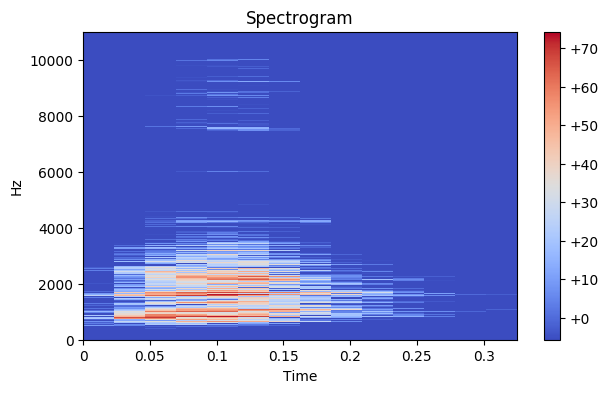

In [110]:
# convert stft feature from amplitude to decibel absolute value
spec = librosa.amplitude_to_db(abs(stft)**2)
plt.figure(figsize=(7, 4))
# display spectrogram using librosa specshow function
librosa.display.specshow(spec, sr=sample_rate, x_axis='time', y_axis='linear')
plt.title(label='Spectrogram')
plt.colorbar(format="%+2.f")
plt.show()

The log-amplitude is helpful, but to have a clear observation, we need to change the frequency axis into log as well.

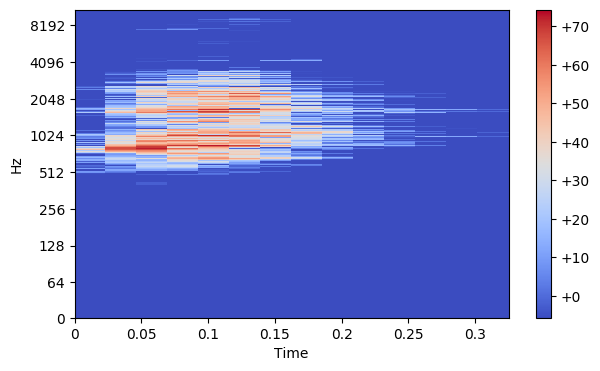

In [111]:
plt.figure(figsize=(7, 4))
librosa.display.specshow(spec, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.f")
plt.show()


The spectrogram as shown above hold all the information that is necessary to understand an audio signal, its time, frequency and amplitude properties. We can simply use these information to train our models, but still this spectrogram is missing a very important detail. The humans perceive the change in frequency a bit differnetly than the one shown in these spectrograms. To overcome this perception issue, there is another type of spectogram that scales the frequency based on the pitch (melody) as perceived by humans. This type of spectogram is called a Mel-spectogram and it shows frequency in Mel-scale. Adding this feature in the plot makes it more desireable to be used for the training of ML/DL models.

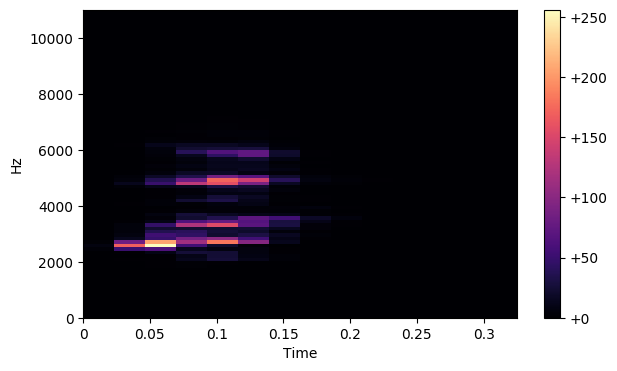

In [181]:
plt.figure(figsize=(7,4))
spectro = librosa.feature.melspectrogram(data,n_mels=90, sr=sample_rate)
librosa.display.specshow(spectro, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.f")
plt.show()

In [124]:
np.shape(spectro)

(128, 14)

### MFCC

Mel-frequency cepstral coefficients (MFCCs) are a group of characteristics frequently utilised in music information retrieval and voice recognition. They are created by employing a filterbank to analyse a signal cepstrally, simulating the human auditory system's reaction to various frequencies. In order to convert frequencies to mel frequencies, which are perceptually more important, the filterbank often utilises a mel scale. The discrete cosine transform is then used to convert the resultant mel-frequency cepstrum to the frequency domain, producing a collection of MFCCs. In addition to MFCCs, we can also calculate the changes in the coeffecient values called delta-MFCCs and delta2-MFCCs. When performing tasks like voice or music identification, machine learning algorithms frequently employ these coefficients as features.

In [119]:
mfccs = librosa.feature.mfcc(y=data, n_mfcc=13, sr=sample_rate)
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [123]:
np.shape(mfccs)

(13, 14)

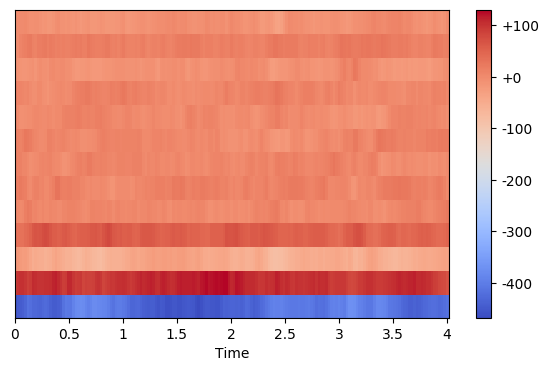

In [55]:
plt.figure(figsize=(7, 4))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sample_rate)
plt.colorbar(format="%+2.f")
plt.show()

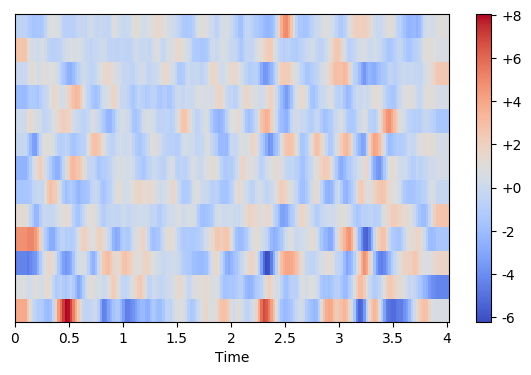

In [56]:
plt.figure(figsize=(7, 4))
librosa.display.specshow(delta_mfccs, 
                         x_axis="time", 
                         sr=sample_rate)
plt.colorbar(format="%+2.f")
plt.show()

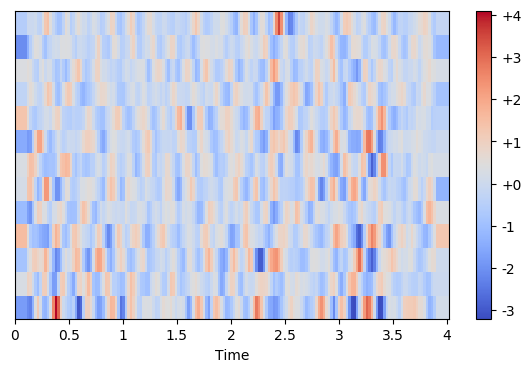

In [57]:
plt.figure(figsize=(7, 4))
librosa.display.specshow(delta2_mfccs, 
                         x_axis="time", 
                         sr=sample_rate)
plt.colorbar(format="%+2.f")
plt.show()

### Feature Extraction

Now that we have suffecient information about the features that we can use for our model, we need to extract these features and create a dataset so that we can train our model using these features.

In [198]:
    # list with spectrogram features
    melspec_list = []
    # list with mfcc features
    mfcc_list = []
    # list with d-mfcc features
    delta_mfcc_list = []   
    # list with d2-mfcc features
    delta2_mfcc_list = []      
    # list with concatenated features
    concat_list = []
    # label lists
    label_list = []

    for i in range(len(df)):
        # path of audio file
        file_path = './audio/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        # load audio file as numpy array
        audio_data, sample_rate = librosa.load(file_path)

        # extract mel spectrogram
        mel_spec = librosa.feature.melspectrogram(audio_data, sr=sample_rate, n_mels=10)
        #average column values of the spec array 
        mel_spec = np.mean(mel_spec, axis=1)
        # append spectrogram features to the list
        melspec_list.append(mel_spec)

        # extract mfccs
        mfcc = librosa.feature.mfcc(audio_data, n_mfcc=13, sr=sample_rate)
        delta_mfcc = librosa.feature.delta(mfcc,mode='wrap')
        delta2_mfcc = librosa.feature.delta(mfcc,mode='wrap', order=2)
        
        # average column values of the mfccs arrays
        mfcc = np.mean(mfcc, axis=1)
        delta_mfcc = np.mean(delta_mfcc, axis=1)
        delta2_mfcc = np.mean(delta2_mfcc, axis=1)
        # append mfcc features to the list
        mfcc_list.append(mfcc) 
        delta_mfcc_list.append(delta_mfcc)
        delta2_mfcc_list.append(delta2_mfcc)     
        

        # concatenate the features of spectrogram and mfcc
        new_features = np.concatenate((mel_spec, mfcc,delta_mfcc,delta2_mfcc), axis=0)
        # append combined features to the list
        concat_list.append(new_features)
    
        # append classID of the audio to the labels list
        label_list.append(df['classID'][i])


/home/msc1/Desktop/AML project/environmental_sound_classification/Sounds-Classification/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
/home/msc1/Desktop/AML project/environmental_sound_classification/Sounds-Classification/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/home/msc1/Desktop/AML project/environmental_sound_classification/Sounds-Classification/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]


In the above code, we extracted 10 values of Mel-spectrogram and 13 values of each MFCCs, Delta-MFCCs and Delta2-MFCCS. We then concatenated these values togeter to make a dataset with 49 columns. To observe this datset we can create a pandas dataframe as shown below

In [221]:
ms = ["MS_" + str(i) for i in range(1,11)]
m = ["M_" + str(i) for i in range(1,14)]
dm = ["DM_" + str(i) for i in range(1,14)]
d2m = ["D2M_" + str(i) for i in range(1,14)]
col= ms+m+dm+d2m
Features=pd.DataFrame(concat_list,columns=col)
Features

,MS_1,MS_2,MS_3,MS_4,MS_5,MS_6,MS_7,MS_8,MS_9,MS_10,...,D2M_4,D2M_5,D2M_6,D2M_7,D2M_8,D2M_9,D2M_10,D2M_11,D2M_12,D2M_13
0,0.010397,4.885858,18.694080,6.911682,12.041814,4.978973,0.410840,0.025499,0.004605,0.010406,...,-3.405980e-08,-5.108970e-08,1.277242e-08,0.000000e+00,-1.702990e-08,-4.257475e-09,3.831727e-08,-8.514950e-09,0.000000e+00,2.554485e-08
1,0.005801,0.001472,0.001066,0.001412,0.003024,0.003003,0.001526,0.000404,0.000024,0.000006,...,-5.512568e-09,-1.378142e-09,2.067213e-09,4.134426e-09,-1.378142e-09,-6.890710e-10,7.579781e-09,2.756284e-09,-1.378142e-09,-1.378142e-09
2,0.004621,0.000699,0.001690,0.001814,0.000819,0.000533,0.000218,0.000107,0.000007,0.000001,...,-2.411749e-09,5.512568e-09,5.512568e-09,-3.617623e-09,4.134426e-09,-3.445355e-10,-8.613388e-10,6.890710e-10,4.134426e-09,4.823497e-09
3,0.012057,0.010407,0.002663,0.002736,0.003007,0.002959,0.001189,0.000780,0.000105,0.000020,...,-8.268852e-09,-8.268852e-09,-1.378142e-09,-2.756284e-09,0.000000e+00,5.512568e-09,2.756284e-09,-1.033607e-09,-9.646994e-09,1.378142e-09
4,0.004631,0.000641,0.000760,0.000799,0.001290,0.001352,0.000348,0.000193,0.000011,0.000002,...,-8.268852e-09,1.722678e-09,0.000000e+00,-1.378142e-08,-6.890710e-10,1.378142e-09,2.756284e-09,-3.789891e-09,1.033607e-09,-3.337688e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,0.011879,0.003191,0.010300,0.007516,0.002040,0.002335,0.000844,0.000106,0.000016,0.000003,...,1.550410e-09,3.789891e-09,-6.890710e-10,-2.067213e-09,-3.100820e-09,-1.722678e-09,2.756284e-09,-1.378142e-09,1.378142e-09,-2.756284e-09
8728,0.014177,0.011168,0.008087,0.002873,0.001358,0.011959,0.142112,0.057883,0.000225,0.000088,...,-1.249775e-08,-1.281820e-09,6.248874e-09,3.845461e-09,3.444892e-09,5.768191e-09,-3.845461e-09,-7.690922e-09,-3.204551e-09,4.165916e-09
8729,0.095023,0.041616,0.066104,0.036440,0.022224,0.025231,0.033332,0.010251,0.002109,0.000893,...,-2.368397e-09,1.578931e-09,-3.157862e-09,6.315724e-09,1.578931e-09,-7.105189e-09,3.157862e-09,6.315724e-09,-3.157862e-09,-7.894655e-10
8730,0.022105,0.025461,0.059470,0.013633,0.005987,0.003412,0.013770,0.003290,0.000044,0.000013,...,-4.374653e-09,6.691211e-10,-1.913911e-09,-1.367079e-09,-2.187326e-09,6.767041e-09,4.374653e-09,-3.007574e-09,1.093663e-09,1.148346e-08


In ML/DL models, it is sometimes important to see if a feature plays significant role in determining the classes. For this purpose we sometimes find the correlation between the features and drop highly correlated columns. But as shown by the below code, none of the features are highly correlated (85% is the industry standard for threshold). Thus we will not be dropping any columns.

In [264]:
def correlation(dataset, threshold):    
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]     # getting the name of column
                col_corr.add(colname)
    return col_corr

threshold=.85   # try 0.85 . 0.90 and 0.95 to see the number of features to be removed
corr_features = correlation(Features, threshold)
if (len(corr_features)) < 1:
       print('There are no features to remove.')
else:
    print(len(set(corr_features)),'features to remove are:',corr_features)

There are no features to remove.


In [268]:
Features.to_csv('/home/msc1/Desktop/ADL_project/environmental_sound_classification/CW2/Features.csv')

### Note:
##### ** Because of a library mismatch, the dataset was stored in form of a csv file, and then loaded again to complete the task in a different venv.**

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,LSTM,Conv2D,MaxPooling1D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [2]:
Features=pd.read_csv('/home/msc1/Desktop/ADL_project/environmental_sound_classification/CW2/features.csv')

In [3]:
from sklearn.decomposition import PCA

# Create a PCA object with the number of components to retain 90% of information
pca = PCA(n_components=0.9)

# Apply PCA to the data
pca.fit(Features.drop('classID',axis=1))

# Transform the data into principal components
pca_data = pca.transform(Features.drop('classID',axis=1))

# Create a new DataFrame with the principal components
pca_Features = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Print the explained variance ratio for each principal component
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.76243137 0.09834598 0.05206953]


In [4]:
pca_Features

,PC1,PC2,PC3
0,-23.080488,39.332249,122.827574
1,189.516705,24.679216,9.401873
2,226.328752,16.228285,7.489724
3,179.622866,32.190079,-2.582220
4,212.682644,22.378837,7.986888
...,...,...,...
8727,167.898659,-2.981466,17.702776
8728,109.845400,39.282410,17.135437
8729,71.839620,10.474502,12.436722
8730,112.447926,0.726008,24.130414


The Explained varience ratio shows that the first Principal Component contains 76.24% of information from the original dataset. The second components contains an additional 9.83% of information and the third component contains an additional 5.2% making the total information in the PCs to be a little over 90%. 

We will convert dependent and independent columns into numpyarray to be used by keras. We will also convert PCA components into numpy array. We will try to train our model with all the features and also the dimentionality reduced features to see how much differnce in the performance can be seen when PCA is applied to the dataset.

In [5]:
concat_array = np.array(Features.drop('classID',axis=1))
pca_array = np.array(pca_Features)
label_array = np.array(Features['classID'])

To convert the class ids into one-hot encoded labels, we can use the to_categorical function from keras.

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
label_array = to_categorical(label_array)
label_array.shape

(8732, 10)